In [6]:
import tensorflow as tf
import pickle
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
with open('/content/drive/MyDrive/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

model = tf.keras.models.load_model('/content/drive/MyDrive/twitter_sentiment.h5',custom_objects={})

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Evaluate the model:

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Twitter_Data.csv')
df.head(5)
df = df[df.category != 0]
df.category = df.category.replace(-1,0)

In [27]:
df = df.dropna()

In [28]:
df['clean_text'] = df['clean_text'].astype(str)

test=tokenizer.texts_to_sequences(df['clean_text'])
test=pad_sequences(test, maxlen=30)

pred = model.predict(test)

3368/3368 [==============================] - 131s 39ms/step


In [29]:
predicted_labels = (pred >= 0.5).astype(int)
predicted_labels

array([[0],
       [1],
       [1],
       ...,
       [0],
       [1],
       [1]])

In [30]:
true_labels = df['category'].astype(int)
true_labels = true_labels.reset_index()
predicted_labels = predicted_labels.flatten()
predicted_labels = pd.Series(predicted_labels)

In [43]:
df2 = pd.concat([true_labels, predicted_labels], axis=1)
df2 = df2.rename(columns={'category': 'True', 0: 'Predict'})

In [44]:
df2.drop('index', axis=1, inplace=True)

In [45]:
df2

,True,Predict
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
107755,1,1
107756,1,0
107757,0,0
107758,0,1


In [47]:
accuracy = (df2['True'] == df2['Predict']).sum()/107760
print('Accuracy:',accuracy.round(2))

Accuracy: 0.65


In [50]:
confusion_matrix = pd.crosstab(df2['True'], df2['Predict'], rownames=['True'], colnames=['Predict'])
confusion_matrix

Predict,0,1
True,,
0,22083,13427
1,24108,48142


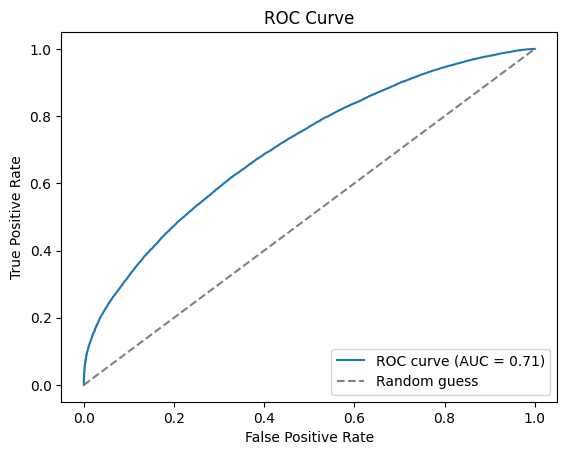

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(df2['True'].values, pred.flatten())
roc_auc = auc(fpr, tpr)
# plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Predict Sentiment Score :

In [66]:
def predict_sentiment_score(model, tokenizer, input_text):

    input_seq = tokenizer.texts_to_sequences([input_text])


    input_seq = pad_sequences(input_seq, maxlen=30)


    pred = model.predict(input_seq)[0][0]

    return pred

In [68]:
input_text = 'What a nice day'


pred = predict_sentiment_score(model, tokenizer, input_text)


print('Sentiment score:', pred)

1/1 [==============================] - 0s 61ms/step
Sentiment score: 0.98864985
